In [2]:
from dDC_compute import input_gates, EShap, parse, compute, EShap_naive
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

### 3 variables 8 nodes

In [3]:
exp = ("OR", ("AND", "A", ("AND", "B", "C")), ("AND", ("NOT", "B"), ("AND", "C", ("OR", "A", ("NOT", "A")))))
query = parse(exp, {}, [])
data = pd.DataFrame({"t": ["A","B","C"], "p":[1,1,1]})
shap_sum = 0
t_shap = []
t_shap_naive = []
for x in ['A','B','C']:
    print(x)
    t1 = time.time()
    eshap = EShap(query, x, data)
    t1 = time.time() - t1
    t_shap.append(t1)
    t2 = time.time()
    eshap_naive = EShap_naive(query, x, data)
    t2 = time.time() - t2
    t_shap_naive.append(t2)
    print(eshap_naive, "Naive", "Time:", t2, "sec")
    print(eshap, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap
print('Shap sum',shap_sum)
print("All true query value", float(compute(query,{"A":True, "B":True, "C":True}).value))

A
0.3333333333333333 Naive Time: 0.007403135299682617 sec
0.3333333333333333 Ours Time: 0.0049092769622802734 sec 

B
-0.16666666666666666 Naive Time: 0.0057544708251953125 sec
-0.16666666666666666 Ours Time: 0.0033636093139648438 sec 

C
0.8333333333333333 Naive Time: 0.005793094635009766 sec
0.8333333333333333 Ours Time: 0.004098176956176758 sec 

Shap sum 0.9999999999999999
All true query value 1.0


### 3 variables, 6 nodes

In [4]:
exp1 = ("AND", ("OR", ("AND", "A", ("NOT", "B")), ("AND", ("NOT", "A"), "B")), "C")
query1 = parse(exp, {}, [])
data1 = pd.DataFrame({"t": ["A","B","C"], "p":[1,1,1]})
shap_sum = 0
t_shap1 = []
t_shap_naive1 = []
for x in ['A','B','C']:
    print(x)
    t1 = time.time()
    eshap1 = EShap(query1, x, data1)
    t1 = time.time() - t1
    t_shap1.append(t1)
    t2 = time.time()
    eshap_naive1 = EShap_naive(query1, x, data1)
    t2 = time.time() - t2
    t_shap_naive1.append(t2)
    print(eshap_naive1, "Naive", "Time:", t2, "sec")
    print(eshap1, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap1
print('Shap sum',shap_sum)
print("All true query value", float(compute(query1,{"A":True, "B":True, "C":True}).value))

A
0.3333333333333333 Naive Time: 0.006598472595214844 sec
0.3333333333333333 Ours Time: 0.005045413970947266 sec 

B
-0.16666666666666666 Naive Time: 0.005769491195678711 sec
-0.16666666666666666 Ours Time: 0.0046291351318359375 sec 

C
0.8333333333333333 Naive Time: 0.00576329231262207 sec
0.8333333333333333 Ours Time: 0.003977537155151367 sec 

Shap sum 0.9999999999999999
All true query value 1.0


### 2 variables 2 nodes

In [6]:
exp2 = ("AND", "A", ("NOT","B"))
query2 = parse(exp2, {}, [])
data2 = pd.DataFrame({"t": ["A", "B"], "p":[1, 1]})
shap_sum = 0
t_shap2 = []
t_shap_naive2 = []
for x in input_gates(query2):
    print(x)
    t1 = time.time()
    eshap2 = EShap(query2, x, data2)
    t1 = time.time() - t1
    t_shap2.append(t1)
    t2 = time.time()
    eshap_naive2 = EShap_naive(query2, x, data2)
    t2 = time.time() - t2
    t_shap_naive2.append(t2)
    print(eshap_naive2, "Naive", "Time:", t2, "sec")
    print(eshap2, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap2
print('Shap sum',shap_sum)
print("All true query value", float(compute(query2,{"A":True, "B":True}).value))

A
0.5 Naive Time: 0.0007731914520263672 sec
0.5 Ours Time: 0.002748250961303711 sec 

B
-0.5 Naive Time: 0.0007276535034179688 sec
-0.5 Ours Time: 0.0007143020629882812 sec 

Shap sum 0.0
All true query value 0.0


### 2 variables 1 node

In [4]:
exp3 = ("OR", "A", "B")
query3 = parse(exp3, {}, [])
data3 = pd.DataFrame({"t": ["A", "B"], "p":[1, 1]})
shap_sum = 0
t_shap3 = []
t_shap_naive3 = []
for x in input_gates(query3):
    print(x)
    t1 = time.time()
    eshap3 = EShap(query3, x, data3)
    t1 = time.time() - t1
    t_shap3.append(t1)
    t2 = time.time()
    eshap_naive3 = EShap_naive(query3, x, data3)
    t2 = time.time() - t2
    t_shap_naive3.append(t2)
    print(eshap_naive3, "Naive", "Time:", t2, "sec")
    print(eshap3, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap3
print('Shap sum',shap_sum)
print("All true query value", float(compute(query3,{"A":True, "B":True}).value))

A
0.5 Naive Time: 0.0005540847778320312 sec
0.5 Ours Time: 0.0008521080017089844 sec 

B
0.5 Naive Time: 0.0005199909210205078 sec
0.5 Ours Time: 0.0004830360412597656 sec 

Shap sum 1.0
All true query value 1.0


### 4 variables 6 nodes

In [7]:
exp4 = ("AND", ("OR", ("AND", "A", ("NOT", "B")), ("AND", "A", "B")), ("AND", "C", "D"))
query4 = parse(exp4, {}, [])
data4 = pd.DataFrame({"t": ["A","B","C","D"], "p":[1,1,1,1]})
shap_sum = 0
t_shap4 = []
t_shap_naive4 = []
for x in input_gates(query4):
    print(x)
    t1 = time.time()
    eshap4 = EShap(query4, x, data4)
    t1 = time.time() - t1
    t_shap4.append(t1)
    t2 = time.time()
    eshap_naive4 = EShap_naive(query4, x, data4)
    t2 = time.time() - t2
    t_shap_naive4.append(t2)
    print(eshap_naive4, "Naive", "Time:", t2, "sec")
    print(eshap4, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap4
print('Shap sum',shap_sum)
print("All true query value", float(compute(query4,{"A":True, "B":True, "C":True, "D":True}).value))

A
0.3333333333333333 Naive Time: 0.013499975204467773 sec
0.3333333333333333 Ours Time: 0.005042314529418945 sec 

B
0.0 Naive Time: 0.025203466415405273 sec
0.0 Ours Time: 0.011240243911743164 sec 

D
0.3333333333333333 Naive Time: 0.020014286041259766 sec
0.3333333333333333 Ours Time: 0.007798433303833008 sec 

C
0.3333333333333333 Naive Time: 0.013612747192382812 sec
0.3333333333333333 Ours Time: 0.003735780715942383 sec 

Shap sum 1.0
All true query value 1.0


In [8]:
g1 = ("AND", "A", "B")
g2 = ("AND", "A", ("NOT", "B"))
g3 = ("OR", g1, g2)

g4 = ("AND", "E", "F")
g5 = ("AND", ("NOT", "E"), ("NOT", "F"))
g6 = ("OR", g4, g5)
g7 = ("AND", "C", "D")
g8 = ("AND", g6, g7)

g9 = ("AND", g3, g8)

g10 = ("AND", "H", ("NOT", "I"))
g11 = ("AND", ("NOT","H"), ("NOT", "I"))
g12 = ("OR", g10, g11)
g13 = ("AND", "G", g12)

g = ("AND", g9, g13)

### 4 variables 7 nodes

In [10]:
query5 = parse(g8, {}, [])
data5 = pd.DataFrame({"t": ["C","D","E","F"], "p":[1,1,1,1]})
shap_sum = 0
t_shap5 = []
t_shap_naive5 = []
for x in input_gates(query5):
    print(x)
    t1 = time.time()
    eshap5 = EShap(query5, x, data5)
    t1 = time.time() - t1
    t_shap5.append(t1)
    t2 = time.time()
    eshap_naive5 = EShap_naive(query5, x, data5)
    t2 = time.time() - t2
    t_shap_naive5.append(t2)
    print(eshap_naive5, "Naive", "Time:", t2, "sec")
    print(eshap5, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap5
print('Shap sum',shap_sum)
print("All true query value", float(compute(query5,{v:True for v in input_gates(query5)}).value))

F
0.16666666666666669 Naive Time: 0.013592243194580078 sec
0.16666666666666669 Ours Time: 0.004358053207397461 sec 

E
0.16666666666666669 Naive Time: 0.013562440872192383 sec
0.16666666666666669 Ours Time: 0.004196643829345703 sec 

D
0.3333333333333333 Naive Time: 0.012629270553588867 sec
0.3333333333333333 Ours Time: 0.004300832748413086 sec 

C
0.3333333333333333 Naive Time: 0.012886524200439453 sec
0.3333333333333333 Ours Time: 0.003753662109375 sec 

Shap sum 1.0
All true query value 1.0


### 6 variables 12 nodes

In [11]:
query6 = parse(g9, {}, [])
data6 = pd.DataFrame({"t": ["A","B","C","D","E","F"], "p":[1,1,1,1,1,1]})
shap_sum = 0
t_shap6 = []
t_shap_naive6 = []
for x in input_gates(query6):
    print(x)
    t1 = time.time()
    eshap6 = EShap(query6, x, data6)
    t1 = time.time() - t1
    t_shap6.append(t1)
    t2 = time.time()
    eshap_naive6 = EShap_naive(query6, x, data6)
    t2 = time.time() - t2
    t_shap_naive6.append(t2)
    print(eshap_naive6, "Naive", "Time:", t2, "sec")
    print(eshap6, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap6
print('Shap sum',shap_sum)
print("All true query value", float(compute(query6,{v:True for v in input_gates(query6)}).value))

A
0.23333333333333334 Naive Time: 0.2228240966796875 sec
0.23333333333333334 Ours Time: 0.006880044937133789 sec 

E
0.15 Naive Time: 0.21634244918823242 sec
0.15 Ours Time: 0.007315635681152344 sec 

F
0.15 Naive Time: 0.2165224552154541 sec
0.15 Ours Time: 0.006978273391723633 sec 

D
0.23333333333333334 Naive Time: 0.2185354232788086 sec
0.23333333333333334 Ours Time: 0.0064504146575927734 sec 

B
0.0 Naive Time: 0.22120308876037598 sec
0.0 Ours Time: 0.008169412612915039 sec 

C
0.23333333333333334 Naive Time: 0.23407983779907227 sec
0.23333333333333334 Ours Time: 0.007574319839477539 sec 

Shap sum 1.0
All true query value 1.0


### 8 variables 19 nodes

In [9]:
query7 = parse(("AND", g9, g12), {}, [])
data7 = pd.DataFrame({"t": ["A","B","C","D","E","F","H","I"], "p":[1,1,1,1,1,1,1,1]})
shap_sum = 0
t_shap7 = []
t_shap_naive7 = []
for x in input_gates(query7):
    print(x)
    t1 = time.time()
    eshap7 = EShap(query7, x, data7)
    t1 = time.time() - t1
    t_shap7.append(t1)
    t2 = time.time()
    eshap_naive7 = EShap_naive(query7, x, data7)
    t2 = time.time() - t2
    t_shap_naive7.append(t2)
    print(eshap_naive7, "Naive", "Time:", t2, "sec")
    print(eshap7, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap7
print('Shap sum',shap_sum)
print("All true query value", float(compute(query7,{v:True for v in input_gates(query7)}).value))

A
0.049999999999999996 Naive Time: 4.6935930252075195 sec
0.04999999999999999 Ours Time: 0.011124134063720703 sec 

D
0.049999999999999996 Naive Time: 5.11628794670105 sec
0.04999999999999999 Ours Time: 0.012902259826660156 sec 

I
-0.18333333333333332 Naive Time: 4.997355937957764 sec
-0.1833333333333333 Ours Time: 0.011568784713745117 sec 

E
0.016666666666666663 Naive Time: 4.997836112976074 sec
0.016666666666666663 Ours Time: 0.014984846115112305 sec 

H
0.0 Naive Time: 5.168933868408203 sec
0.0 Ours Time: 0.015935182571411133 sec 

B
0.0 Naive Time: 5.172228813171387 sec
0.0 Ours Time: 0.016761064529418945 sec 

F
0.016666666666666663 Naive Time: 5.180880069732666 sec
0.016666666666666663 Ours Time: 0.015569925308227539 sec 

C
0.049999999999999996 Naive Time: 5.224364757537842 sec
0.04999999999999999 Ours Time: 0.012119054794311523 sec 

Shap sum 0.0
All true query value 0.0


### 9 variables 20 nodes

In [10]:
query8 = parse(g, {}, [])
data8 = pd.DataFrame({"t": ["A","B","C","D","E","F","G","H","I"], "p":[1,1,1,1,1,1,1,1,1]})
shap_sum = 0
t_shap8 = []
t_shap_naive8 = []
for x in input_gates(query8):
    print(x)
    t1 = time.time()
    eshap8 = EShap(query8, x, data8)
    t1 = time.time() - t1
    t_shap8.append(t1)
    t2 = time.time()
    eshap_naive8 = EShap_naive(query8, x, data8)
    t2 = time.time() - t2
    t_shap_naive8.append(t2)
    print(eshap_naive8, "Naive", "Time:", t2, "sec")
    print(eshap8, "Ours", "Time:", t1, "sec", '\n')
    shap_sum += eshap8
print('Shap sum',shap_sum)
print("All true query value", float(compute(query8,{v:True for v in input_gates(query8)}).value))

A
0.03095238095238095 Naive Time: 18.051841974258423 sec
0.03095238095238095 Ours Time: 0.013918876647949219 sec 

D
0.03095238095238095 Naive Time: 17.65761399269104 sec
0.03095238095238095 Ours Time: 0.013216018676757812 sec 

I
-0.15238095238095237 Naive Time: 17.637621879577637 sec
-0.15238095238095237 Ours Time: 0.013082265853881836 sec 

E
0.014285714285714285 Naive Time: 17.512749195098877 sec
0.014285714285714285 Ours Time: 0.017763853073120117 sec 

H
0.0 Naive Time: 17.107800722122192 sec
0.0 Ours Time: 0.01819896697998047 sec 

G
0.03095238095238095 Naive Time: 17.286623001098633 sec
0.03095238095238095 Ours Time: 0.01446986198425293 sec 

B
0.0 Naive Time: 17.410332202911377 sec
0.0 Ours Time: 0.019411087036132812 sec 

F
0.014285714285714285 Naive Time: 17.53767967224121 sec
0.014285714285714285 Ours Time: 0.017081260681152344 sec 

C
0.03095238095238095 Naive Time: 17.483834981918335 sec
0.03095238095238095 Ours Time: 0.013036012649536133 sec 

Shap sum 1.734723475976807e

In [25]:
shaps = [t_shap3, t_shap2, t_shap1, t_shap, t_shap4, t_shap5, t_shap6, t_shap7, t_shap8]
shaps_naive = [t_shap_naive3, t_shap_naive2, t_shap_naive1, t_shap_naive, t_shap_naive4, t_shap_naive5, t_shap_naive6, t_shap_naive7, t_shap_naive8]

In [26]:
x_lab = ['2-1', '2-2', '3-6', '3-8', '4-6', '4-7', '6-12', '8-19', '9-20']

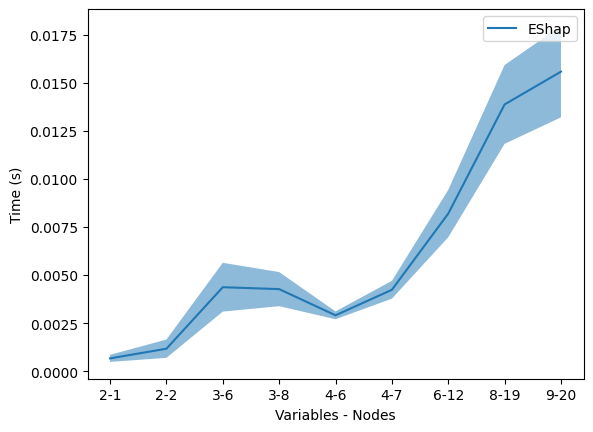

In [28]:
plt.plot(x_lab, [np.mean(t) for t in shaps], label = "EShap")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in shaps], [np.mean(t)-np.std(t) for t in shaps], alpha = 0.5)
plt.xlabel("Variables - Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("Eshap.pdf")
plt.savefig("Eshap.png")
plt.show()

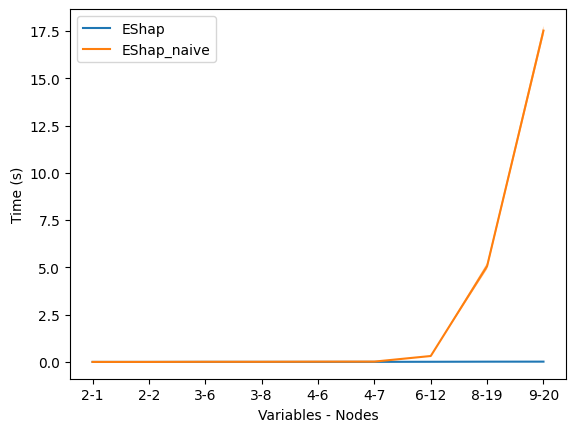

In [29]:
plt.plot(x_lab, [np.mean(t) for t in shaps], label = "EShap")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in shaps], [np.mean(t)-np.std(t) for t in shaps], alpha = 0.5)

plt.plot(x_lab, [np.mean(t) for t in shaps_naive], label = "EShap_naive")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in shaps_naive], [np.mean(t)-np.std(t) for t in shaps_naive], alpha = 0.5)
plt.xlabel("Variables - Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("Eshap_vs_Eshap_naive.pdf")
plt.savefig("Eshap_vs_Eshap_naive.png")
plt.show()